In [1]:
library(ggplot2)
library(dplyr)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
umap_data <- arrow::read_parquet(file.path("../data/first_time/aggregate_umap_embeddings.parquet"))
head(umap_data)

Metadata_treatment,Metadata_Well,Metadata_treatment1,Metadata_Time,Metadata_treatment2,Metadata_treatment1_dose,Metadata_treatment1_unit,Metadata_treatment2_dose,Metadata_treatment2_unit,Metadata_serum,UMAP0,UMAP1
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Ab1-42 0.4 uM,N11,Ab1-42,01,NA,0.4,uM,NA,NA,NuSerum,7.434564,7.951320
Ab1-42 0.4 uM,N11,Ab1-42,02,NA,0.4,uM,NA,NA,NuSerum,7.463485,7.975397
Ab1-42 0.4 uM,N11,Ab1-42,03,NA,0.4,uM,NA,NA,NuSerum,7.646247,8.178801
Ab1-42 0.4 uM,N11,Ab1-42,04,NA,0.4,uM,NA,NA,NuSerum,6.757718,8.497933
Ab1-42 0.4 uM,N11,Ab1-42,05,NA,0.4,uM,NA,NA,NuSerum,6.434648,8.608323
Ab1-42 0.4 uM,N11,Ab1-42,06,NA,0.4,uM,NA,NA,NuSerum,6.125455,8.599121


In [3]:
# map the timepoints to the actual hour timepoint
timepoints <- data.frame(
    reference = c("00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17"),
    Metadata_timepoint  = c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,90)
)
# map the timepoints to the main df 
umap_data <- umap_data %>% left_join(timepoints, by = c("Metadata_Time" = "reference"))
umap_data$Metadata_timepoint <- as.numeric(umap_data$Metadata_timepoint)
umap_data$Metadata_timepoint_hours <- paste0(umap_data$Metadata_timepoint, " hours")
head(umap_data)

Metadata_treatment,Metadata_Well,Metadata_treatment1,Metadata_Time,Metadata_treatment2,Metadata_treatment1_dose,Metadata_treatment1_unit,Metadata_treatment2_dose,Metadata_treatment2_unit,Metadata_serum,UMAP0,UMAP1,Metadata_timepoint,Metadata_timepoint_hours
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Ab1-42 0.4 uM,N11,Ab1-42,01,NA,0.4,uM,NA,NA,NuSerum,7.434564,7.951320,4,4 hours
Ab1-42 0.4 uM,N11,Ab1-42,02,NA,0.4,uM,NA,NA,NuSerum,7.463485,7.975397,7,7 hours
Ab1-42 0.4 uM,N11,Ab1-42,03,NA,0.4,uM,NA,NA,NuSerum,7.646247,8.178801,10,10 hours
Ab1-42 0.4 uM,N11,Ab1-42,04,NA,0.4,uM,NA,NA,NuSerum,6.757718,8.497933,13,13 hours
Ab1-42 0.4 uM,N11,Ab1-42,05,NA,0.4,uM,NA,NA,NuSerum,6.434648,8.608323,16,16 hours
Ab1-42 0.4 uM,N11,Ab1-42,06,NA,0.4,uM,NA,NA,NuSerum,6.125455,8.599121,19,19 hours


In [4]:
figure_path <- file.path("..","figures","first_time")
# create the output directory if it does not exist
if (!dir.exists(figure_path)) {
  dir.create(figure_path)
}

In [5]:
unique(umap_data$Metadata_treatment)
umap_data$Metadata_treatment <- factor(umap_data$Metadata_treatment, levels = c(
    'Media',
    'DMSO CTL',
    'no Hoechst',

    'LPS 0.1 ug/ml',
    'LPS 1 ug/ml',
    'LPS 10 ug/ml',
    'LPS 1 ug/ml + ATP 2.5 mM',
    'LPS 1 ug/ml + Nigericin 0.1 uM',
    'LPS 1 ug/ml + Nigericin 0.5uM',
    'LPS 1 ug/ml + Nigericin 1 uM',
    'LPS 1 ug/ml + Nigericin 3uM',
    'LPS 1 ug/ml + Nigericin 5uM',

    'Flagellin 0.1 ug/ml',
    'Flagellin 1 ug/ml',
    'Flagellin 10 ug/ml',

    'Thapsigargin 0.5uM',
    'Thapsigargin 1 uM',
    'Thapsigargin 10 uM',
    'H2O2 100 nM',
    'H2O2 100 uM',
    'H2O2 500 uM',

    'Ab1-42 0.4 uM',
    'Ab1-42 2 uM',
    'Ab1-42 10 uM'
))
unique(umap_data$Metadata_treatment)


[1] "Ab1-42 0.4 uM"                  "DMSO CTL"                      
 [3] "H2O2 100 uM"                    "Flagellin 0.1 ug/ml"           
 [5] "H2O2 100 nM"                    "Flagellin 1 ug/ml"             
 [7] "LPS 1 ug/ml + Nigericin 3uM"    "Thapsigargin 10 uM"            
 [9] "H2O2 500 uM"                    "Media"                         
[11] "LPS 1 ug/ml + Nigericin 5uM"    "Thapsigargin 1 uM"             
[13] "LPS 1 ug/ml + Nigericin 0.5uM"  "Ab1-42 2 uM"                   
[15] "Ab1-42 10 uM"                   "LPS 10 ug/ml"                  
[17] "Flagellin 10 ug/ml"             "LPS 1 ug/ml + Nigericin 1 uM"  
[19] "LPS 1 ug/ml"                    "LPS 1 ug/ml + ATP 2.5 mM"      
[21] "LPS 0.1 ug/ml"                  "Thapsigargin 0.5uM"            
[23] "no Hoechst"                     "LPS 1 ug/ml + Nigericin 0.1 uM"

[1] Ab1-42 0.4 uM                  DMSO CTL                      
 [3] H2O2 100 uM                    Flagellin 0.1 ug/ml           
 [5] H2O2 100 nM                    Flagellin 1 ug/ml             
 [7] LPS 1 ug/ml + Nigericin 3uM    Thapsigargin 10 uM            
 [9] H2O2 500 uM                    Media                         
[11] LPS 1 ug/ml + Nigericin 5uM    Thapsigargin 1 uM             
[13] LPS 1 ug/ml + Nigericin 0.5uM  Ab1-42 2 uM                   
[15] Ab1-42 10 uM                   LPS 10 ug/ml                  
[17] Flagellin 10 ug/ml             LPS 1 ug/ml + Nigericin 1 uM  
[19] LPS 1 ug/ml                    LPS 1 ug/ml + ATP 2.5 mM      
[21] LPS 0.1 ug/ml                  Thapsigargin 0.5uM            
[23] no Hoechst                     LPS 1 ug/ml + Nigericin 0.1 uM
24 Levels: Media DMSO CTL no Hoechst LPS 0.1 ug/ml LPS 1 ug/ml ... Ab1-42 10 uM

In [6]:


# 9 colors
# col 1 - 3 hues
# colorgrad1 <- c("white", "grey", "#585858")
colorgrad1 <- colorRampPalette(c("lightgrey", "grey"))(3)
# col 2 - 5 hues color ramp 5 hues
colorgrad2 <- colorRampPalette(c("pink", "darkred"))(11)
# col 3 - 3 hues
colorgrad3 <- colorRampPalette(c("yellow", "brown"))(3)
# col 4 - 3 hues
colorgrad4 <- colorRampPalette(c("lightblue", "darkblue"))(6)
# col 5 - 2 hues
colorgrad5 <- colorRampPalette(c("lightgreen", "darkgreen"))(3)
# col 6 - 3 hues
colorgrad6 <- colorRampPalette(c("purple", "#2e004b"))(3)
# col 7 - 2 hues
colorgrad7 <- colorRampPalette(c("cyan", "darkcyan"))(4)
# col 8 - 2 hues
colorgrad8 <- colorRampPalette(c("#ebb676", "darkorange"))(3)
# col 9 - 3 hues
colorgrad9 <- colorRampPalette(c("magenta", "#833b83"))(3)

In [7]:
# define the colors
colors <- c(
    'Media' = colorgrad1[1],
    'DMSO CTL' = colorgrad1[2],
    'no Hoechst' = colorgrad1[3],

    'LPS 0.1 ug/ml' = colorgrad2[1],
    'LPS 1 ug/ml' = colorgrad2[2],
    'LPS 10 ug/ml' = colorgrad2[3],
    'LPS 1 ug/ml + ATP 2.5 mM' = colorgrad2[4],
    'LPS 1 ug/ml + Nigericin 0.1 uM' = colorgrad2[5],
    'LPS 1 ug/ml + Nigericin 0.5uM' = colorgrad2[6],
    'LPS 1 ug/ml + Nigericin 1 uM' = colorgrad2[7],
    'LPS 1 ug/ml + Nigericin 3uM' = colorgrad2[8],
    'LPS 1 ug/ml + Nigericin 5uM' = colorgrad2[9],

    'Flagellin 0.1 ug/ml' = colorgrad5[1],
    'Flagellin 1 ug/ml' = colorgrad5[2],
    'Flagellin 10 ug/ml' = colorgrad5[3],

    'Thapsigargin 0.5uM' = colorgrad8[1],
    'Thapsigargin 1 uM' = colorgrad8[2],
    'Thapsigargin 10 uM' = colorgrad8[3],
    
    'H2O2 100 nM' = colorgrad7[1],
    'H2O2 100 uM' = colorgrad7[2],
    'H2O2 500 uM' = colorgrad7[3],

    'Ab1-42 0.4 uM' = colorgrad4[1],
    'Ab1-42 2 uM' = colorgrad4[2],
    'Ab1-42 10 uM' = colorgrad4[3]
)

png 
  2

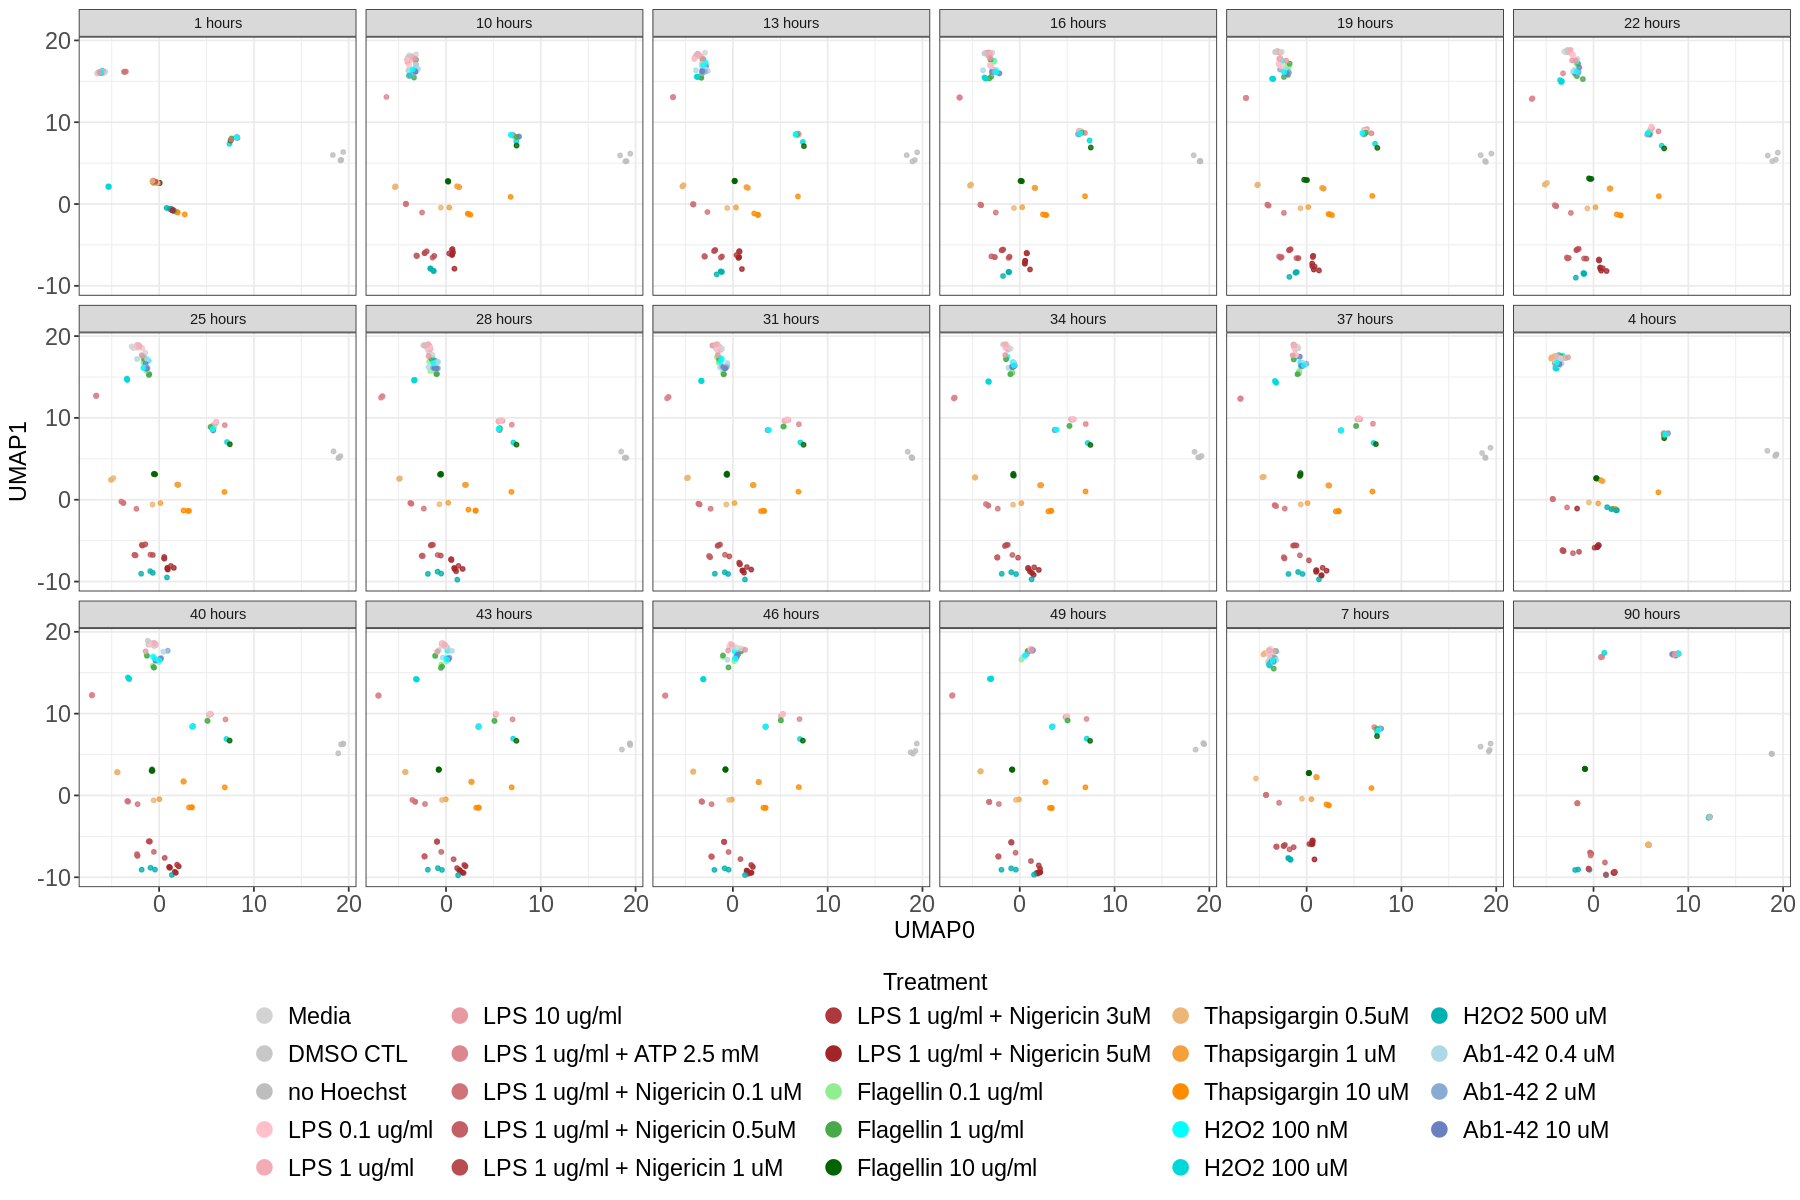

In [8]:
# plot the data
width <- 15
height <- 10
options(repr.plot.width=width, repr.plot.height=height)

umap_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_treatment), size=1, alpha=0.8)
    + scale_color_manual(
        values = colors
    )
    # move the legend to the bottom
    + guides(
        color = guide_legend(ncol = 5, title = "Treatment", override.aes = list(size = 4, alpha = 1)),
        # move guide title to top
        title.position = "top",
    )

    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_timepoint_hours, ncol = 6)
)
png(file.path(figure_path,"umap_plot_facet_time_bulk.png"), width=width, height=height, units="in", res=600)
umap_plot
dev.off()
umap_plot

png 
  2

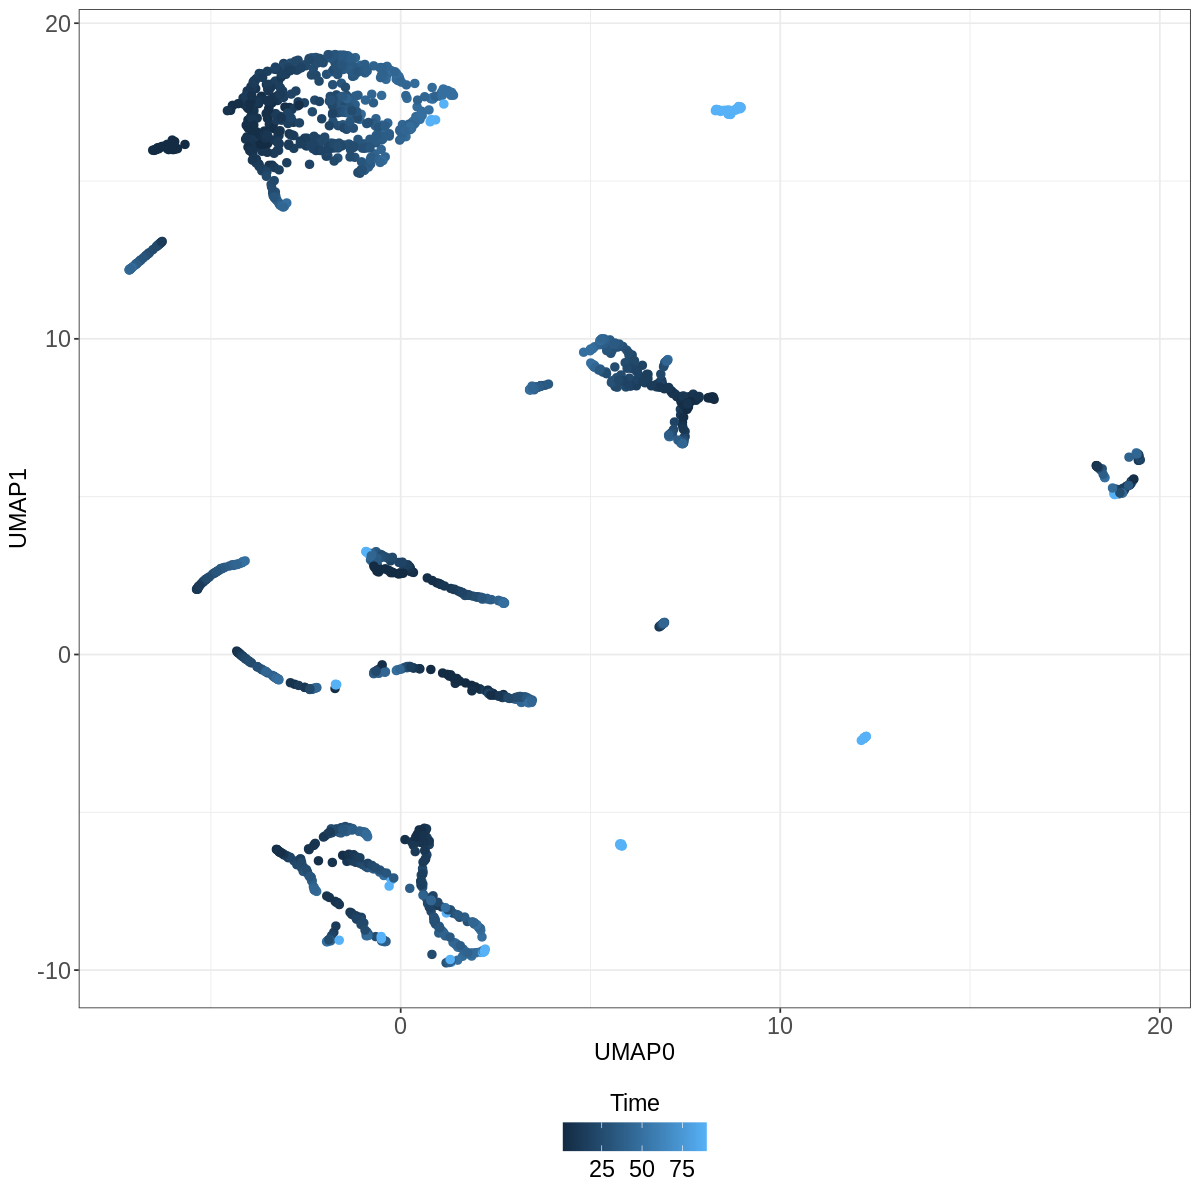

In [9]:
height <- 10
width <- 10
options(repr.plot.width=width, repr.plot.height=height)
umap_all_time_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_timepoint), size=2)
    # move the legend to the bottom
    + guides(
        # make the legend a continuous color scale
        color = guide_colorbar(title = "Time"),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
)
png(file.path(figure_path,"umap_all_time_plot_col_by_treatment_bulk.png"), width=width, height=height, units="in", res=600)
umap_all_time_plot
dev.off()
umap_all_time_plot

png 
  2

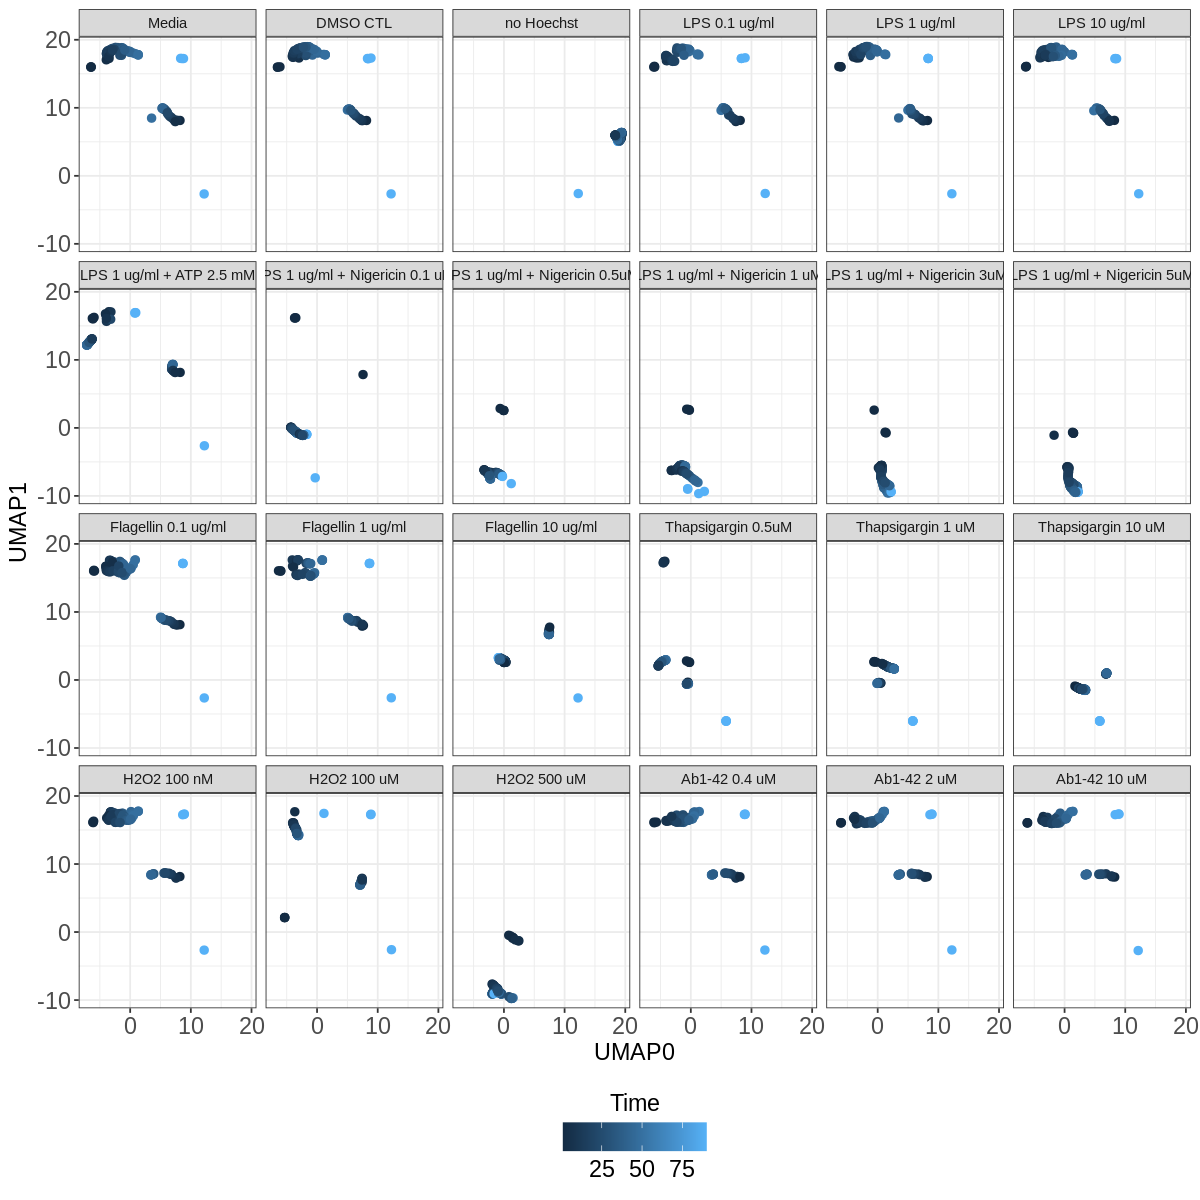

In [10]:
umap_all_time_plot_facet <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_timepoint), size=2)
    # move the legend to the bottom
    + guides(
        # make the legend a continuous color scale
        color = guide_colorbar(title = "Time"),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_treatment, ncol = 6)
)
png(file.path(figure_path,"umap_all_time_plot_facet_bulk.png"), width=width, height=height, units="in", res=600)
umap_all_time_plot_facet
dev.off()
umap_all_time_plot_facet